# Laptop price predictor 
In this note book we will make a predictor to predict the price of a laptop giving some characteristics. In this project we will perform a lot of preprocessing and exploratory data analysis.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

Importing the data from csv

In [3]:
df = pd.read_csv("laptop_price.csv",encoding='latin-1')
df.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94


In [4]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [5]:
df.shape

(1303, 13)

We have 11 characteristics on this dataset, but some of them are really noicy, we will deal with them in the EDA.

Lets get some more information about this dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


It looks like we have no null values

In [7]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

So this is a near perfect dataset, its awsome for academic research and to get some knowledge on how things work, the only problem is that you rarely come across data like this as it usually needs to be cleaned and processed

Now lets see the unique values that we have

In [8]:
for col in df.columns:
    if col!='Price_euros':
        print(f'{col} colum has {df[col].unique().size} unique elements'+'__'*20,f'\nUnique values in {col}:\n {df[col].unique()}\n')

laptop_ID colum has 1303 unique elements________________________________________ 
Unique values in laptop_ID:
 [   1    2    3 ... 1318 1319 1320]

Company colum has 19 unique elements________________________________________ 
Unique values in Company:
 ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']

Product colum has 618 unique elements________________________________________ 
Unique values in Product:
 ['MacBook Pro' 'Macbook Air' '250 G6' 'Aspire 3' 'ZenBook UX430UN'
 'Swift 3' 'Inspiron 3567' 'MacBook 12"' 'IdeaPad 320-15IKB' 'XPS 13'
 'Vivobook E200HA' 'Legion Y520-15IKBN' '255 G6' 'Inspiron 5379'
 '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)' 'MacBook Air' 'Inspiron 5570'
 'Latitude 5590' 'ProBook 470' 'LapBook 15.6"'
 'E402WA-GA010T (E2-6110/2GB/32GB/W10)'
 '17-ak001nv (A6-9220/4GB/500GB/Radeon' 'IdeaPad 120S-14IAP'
 'Inspiron 5770' 'ProBook 450' 'X540UA-DM186 (i3-6006U/4


As we can observe; `Ram`, `Memory` and `Weight` are numerical data but have a unit attached, lets fix that

In [9]:
df['Ram']=df['Ram'].str.replace('GB','')
df['Ram']=df['Ram'].astype('int32')
df=df.rename(columns={"Ram": "Ram (GB)"})
df['Weight']=df['Weight'].str.replace('kg','')
df['Weight']=df['Weight'].astype('float64')

df=df.rename(columns={"Weight": "Weight (kg)"})

In [10]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram (GB),Memory,Gpu,OpSys,Weight (kg),Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


## Exploratory Data Analysis

### Numerical data

In [11]:
df.describe()

,laptop_ID,Inches,Ram (GB),Weight (kg),Price_euros
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,8.382195,2.038734,1123.686992
std,381.172104,1.426304,5.084665,0.665475,699.009043
min,1.000000,10.100000,2.000000,0.690000,174.000000
25%,331.500000,14.000000,4.000000,1.500000,599.000000
50%,659.000000,15.600000,8.000000,2.040000,977.000000
75%,990.500000,15.600000,8.000000,2.300000,1487.880000
max,1320.000000,18.400000,64.000000,4.700000,6099.000000


#### Discrete data 


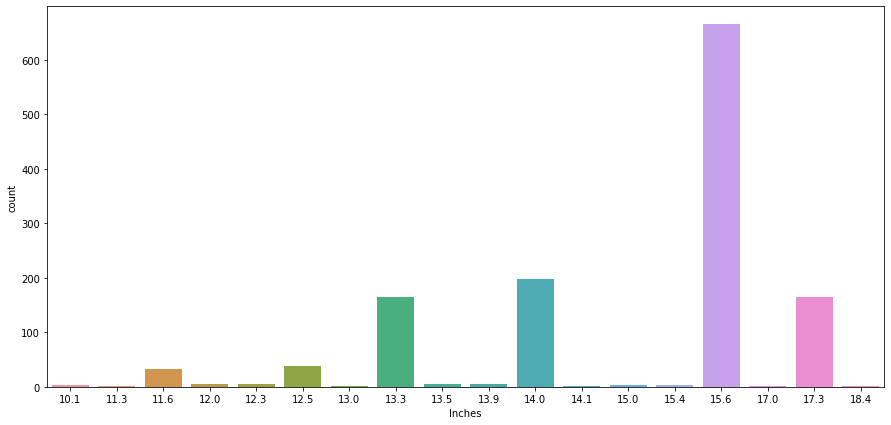

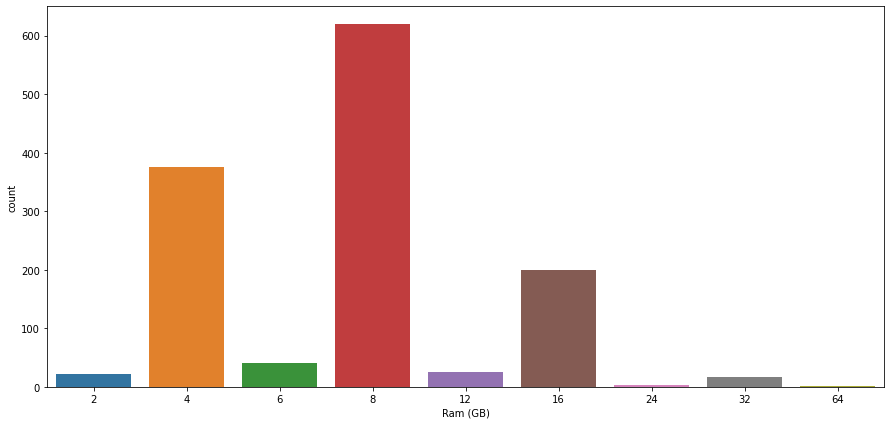

In [12]:
for variable in ['Inches','Ram (GB)']:
       plt.figure(figsize=(15,7))
       sn.countplot(x=variable,data = df)

These graphs tell us that people prefere laptops with 15.6" displays, and laptops with 8GB of Ram are the most bought.

#### Continuous data 

Let's take a plot the Price and weight counts

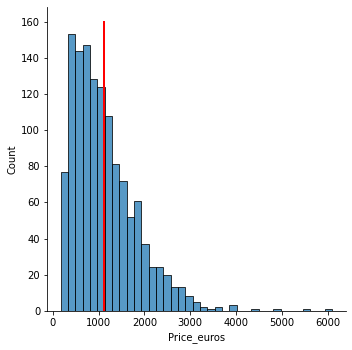

In [13]:
sn.displot(df['Price_euros'])
plt.plot([df['Price_euros'].mean(), df['Price_euros'].mean()], [160, 0],color='red', linewidth=2)

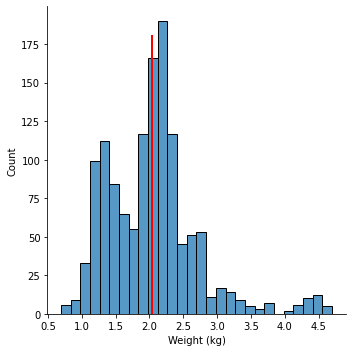

In [14]:
sn.displot(df['Weight (kg)'])
plt.plot([df['Weight (kg)'].mean(), df['Weight (kg)'].mean()], [180, 0],color='red' ,linewidth=2)


We observer that weight is unevenly spread so the mean doesn't give a useful information, we can see that this data has a some laptops whos weight is more than 4kg but are still sold, we can probably say that these laptops are the workstation.

### Categorical data

Let's plot some of these variables

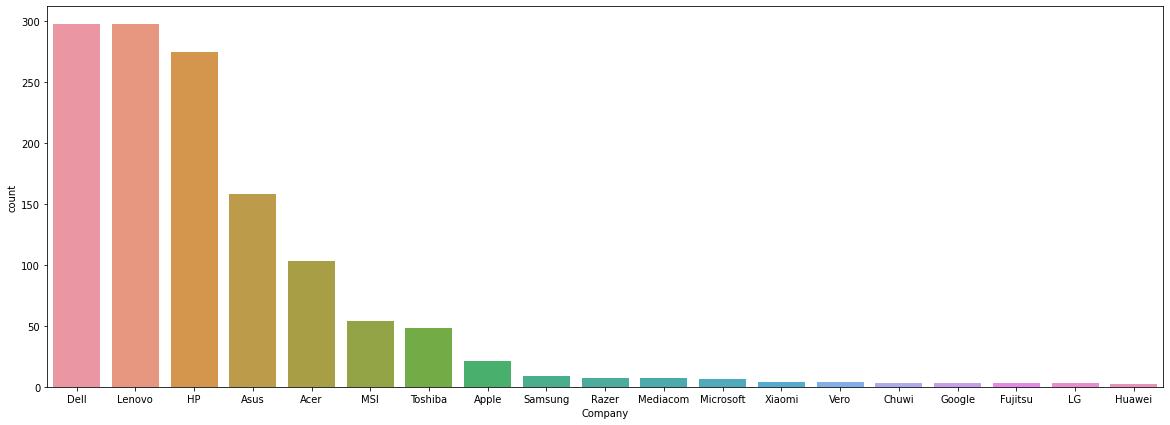

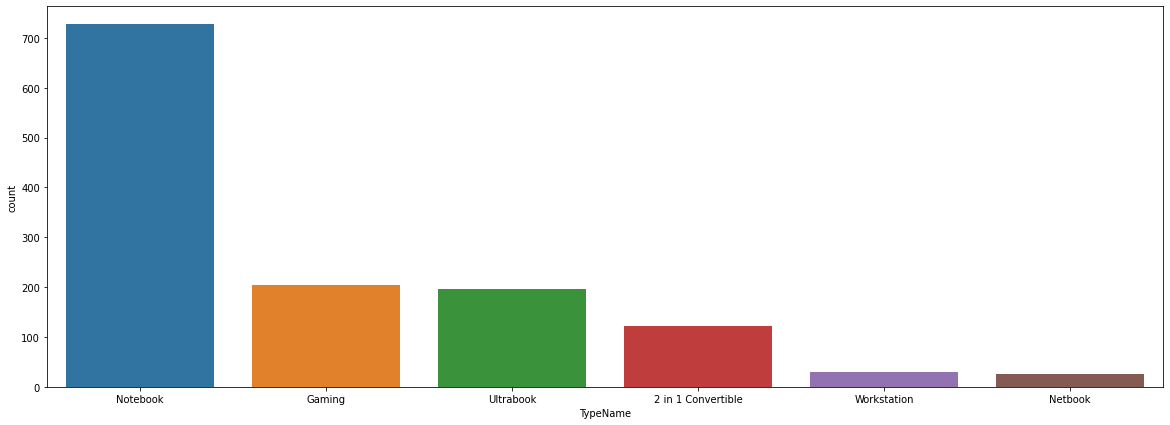

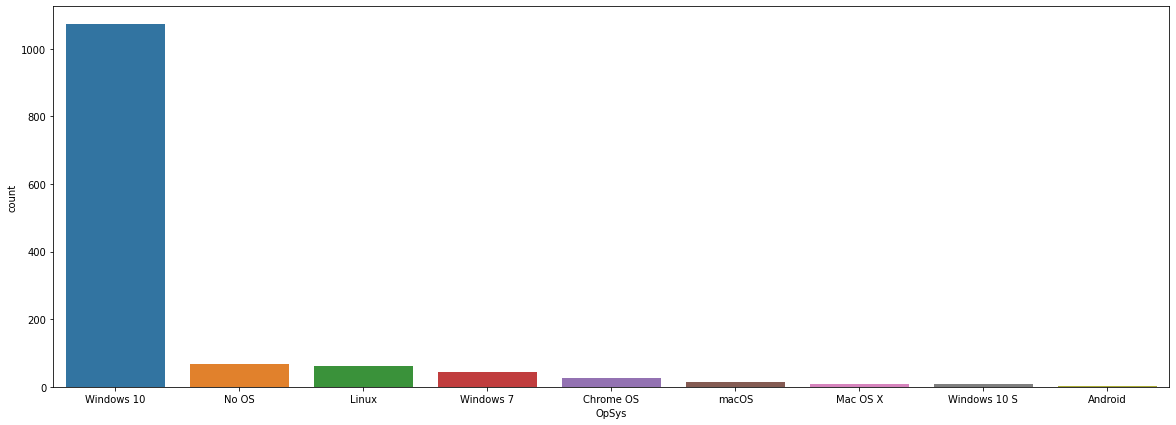

In [15]:
Categorical=['Company', 'TypeName', 'OpSys']

for variable in Categorical:
       plt.figure(figsize=(20,7))
       sn.countplot(x=variable,data = df, order =df[variable].value_counts().index)

From these graphs we can see that windows 10 is the most popular OS in the dataset. We can also observe that Dell and Lenovo are fighting for the most popular brand, notebooks are the most popular type sold.

Let's explore more about each company and their prices

<AxesSubplot:xlabel='Company', ylabel='Price_euros'>

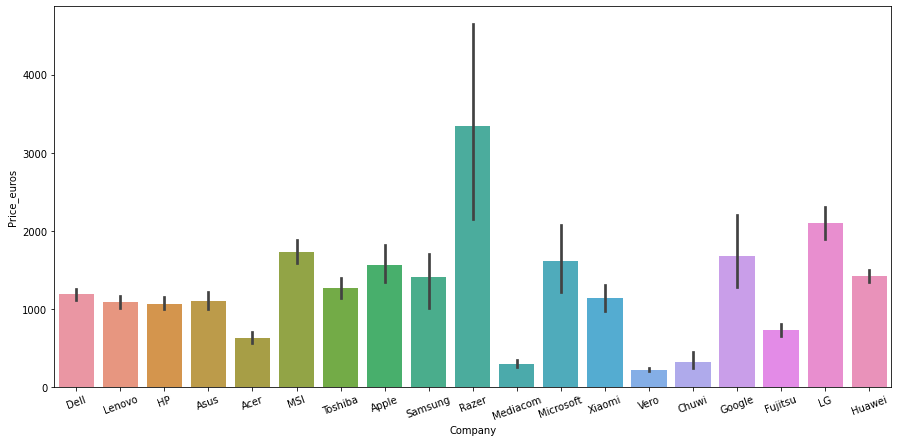

In [16]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=20)
sn.barplot(x = df['Company'],y = df['Price_euros'],order=df['Company'].value_counts().index)

We observe that Razor product have the most variation in price; peaking at 42244.11 MAD and reaching a bottom at 7127.26 MAD with a mean of 23176.72 MAD.

Now let's see the price variation based on laptop type.

<AxesSubplot:xlabel='TypeName', ylabel='count'>

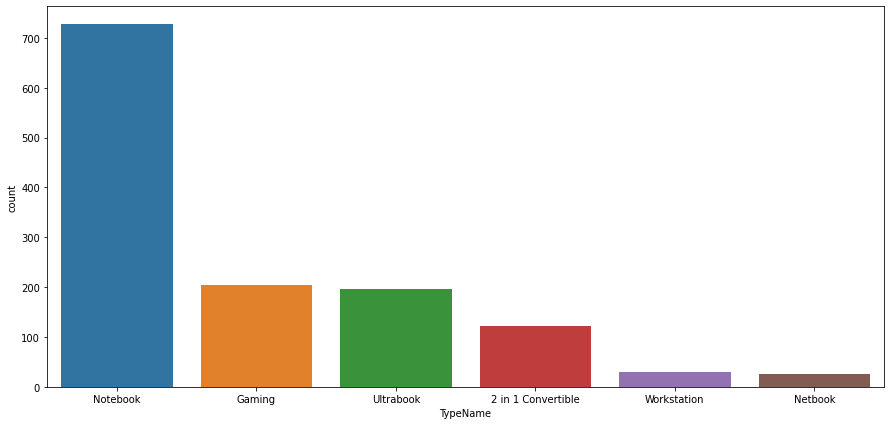

In [17]:
plt.figure(figsize=(15,7))
sn.countplot(x=df['TypeName'],order=df['TypeName'].value_counts().index)

<AxesSubplot:xlabel='TypeName', ylabel='Price_euros'>

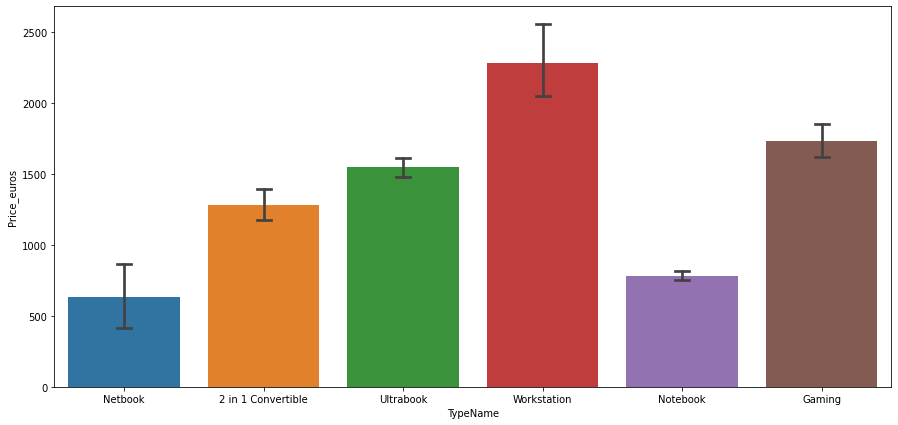

In [18]:
plt.figure(figsize=(15,7))
x = df.groupby(['TypeName']).Price_euros.max().sort_values().keys()
sn.barplot(x = 'TypeName',y= 'Price_euros',data=df,order=x,capsize=.1)

Notebooks have the least amount of variation in price compared to other laptop types, this is probably a results from the high number of notebooks and competitors in the market.
Also the high price of workstation and the low number of units sold shows that workstations are more of a niche product.

#### Deep dive to `ScreenResolution` column

In [19]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

This column has three type of data in it:
- _TouchScreen_,
- _display panel_ (IPS or TN Panels)
- and _Max Screen Resolution_ (i.e. Full HD 2560x1440 ...).

We need to separate this information into different columns. To do that we will one-hot encode some of this data, meaning we will convert each categorical (Touchscreen and Display) value into a new categorical column and assign a binary value of 1 or 0 to those columns.

Why '1 and 0' and not 'Yes' and 'No'? because we will give this data to an algorithm to learn from therefore '1 and 0' are the best choice.

##### Starting with _TouchScreen_:

In [20]:
df["TouchScreen"]=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df['ScreenResolution']=df['ScreenResolution'].replace(regex={r"/* *Touchscreen /*":""})
df.tail()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram (GB),Memory,Gpu,OpSys,Weight (kg),Price_euros,TouchScreen
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.0,1
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.0,1
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.0,0
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.0,0
1302,1320,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,369.0,0


<AxesSubplot:xlabel='TouchScreen', ylabel='count'>

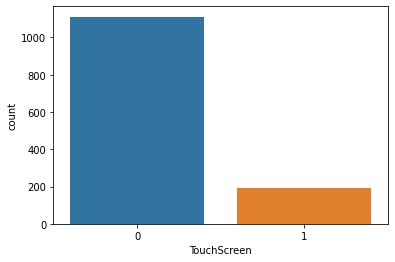

In [21]:
sn.countplot(x='TouchScreen',data=df)

As we can see most laptops in this dataset don't have a TouchScreen, just 192 have this functionality

<AxesSubplot:xlabel='TouchScreen', ylabel='Price_euros'>

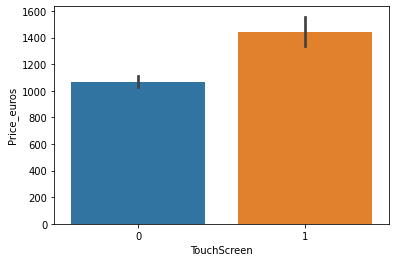

In [22]:
sn.barplot(x = 'TouchScreen',y= 'Price_euros',data=df)

Price of laptops with touchscreen is subjected to alot of variation avreging at 10009.37, in contrast to normal ones that have an average price of about 7753.11

let see how each type of df 

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

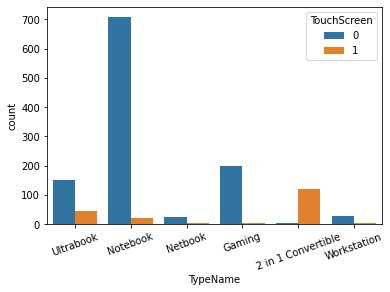

In [23]:
sn.countplot(x="TypeName", hue="TouchScreen", data=df)
plt.xticks(rotation=20)

In [24]:
pd.crosstab(index=df['TouchScreen'], columns=df['TypeName'])

TypeName,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
TouchScreen,,,,,,
0,2,200,23,708,151,27
1,119,5,2,19,45,2


As we can see most of the laptops that have a Touchscreen are 2 in 1 Convertible, we can also see the most popular laptop type don't usual come with touch screen.

We could say that Touchscreen are mostly a luxury for laptop users

##### Display panel

For the display panel we will asign 1 to observations with IPS panles and 0 to TN panels we can flip them it doesn't matter.

In [25]:
df["IPS Display panel"]=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
df['ScreenResolution']=df['ScreenResolution'].replace(regex={r"IPS Panel.[Retina Display ]*":""})
df.tail()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram (GB),Memory,Gpu,OpSys,Weight (kg),Price_euros,TouchScreen,IPS Display panel
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.0,1,1
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,Quad HD+ 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.0,1,1
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.0,0,0
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.0,0,0
1302,1320,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,369.0,0,0


While we at it lets also clean the `ScreenResolution`

In [26]:
df['ScreenResolution']=df['ScreenResolution'].replace(regex={r"(4K)?[^0-9^x]*":""})

<AxesSubplot:xlabel='IPS Display panel', ylabel='count'>

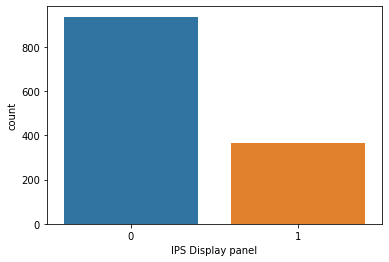

In [27]:
sn.countplot(x='IPS Display panel',data=df)

Most laptops in this dataset dont have IPS panel but TN ones insted.

<AxesSubplot:xlabel='IPS Display panel', ylabel='Price_euros'>

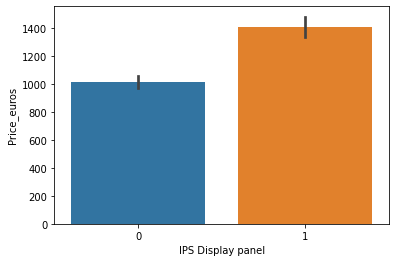

In [28]:
sn.barplot(x = 'IPS Display panel',y= 'Price_euros',data=df)

IPS display panels are more expencive than TN panels 

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

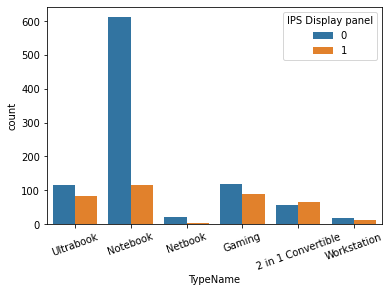

In [29]:
sn.countplot(x="TypeName", hue="IPS Display panel", data=df)
plt.xticks(rotation=20)

In [30]:
pd.crosstab(index=df['IPS Display panel'], columns=df['TypeName'])

TypeName,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
IPS Display panel,,,,,,
0,56,117,21,612,114,18
1,65,88,4,115,82,11


We can see here that most Notebooks and netbooks laptop types dont use TN panel probably because of the high-price, more than half of 2 in 1 convertible laptops use IPS panels, similarly for workstations, ultrabooks and gaming laptops, close to half of them have IPS, this is logical as these panel provide better view from an angel compared to TN counterpart so they are more of a premium adition.

##### ScreenResolution

In [31]:
df['ScreenResolution'].value_counts()

1920x1080    841
1366x768     305
3840x2160     43
3200x1800     27
1600x900      23
2560x1440     18
2256x1504      6
2560x1600      6
2304x1440      6
560x1440       5
920x1200       4
1440x900       4
2880x1800      4
2400x1600      3
366x768        3
2160x1440      2
2736x1824      1
1920x1200      1
400x1600       1
Name: ScreenResolution, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '1920x1080'),
  Text(1, 0, '1366x768'),
  Text(2, 0, '3840x2160'),
  Text(3, 0, '3200x1800'),
  Text(4, 0, '1600x900'),
  Text(5, 0, '2560x1440'),
  Text(6, 0, '2256x1504'),
  Text(7, 0, '2560x1600'),
  Text(8, 0, '2304x1440'),
  Text(9, 0, '560x1440'),
  Text(10, 0, '920x1200'),
  Text(11, 0, '1440x900'),
  Text(12, 0, '2880x1800'),
  Text(13, 0, '2400x1600'),
  Text(14, 0, '366x768'),
  Text(15, 0, '2160x1440'),
  Text(16, 0, '2736x1824'),
  Text(17, 0, '1920x1200'),
  Text(18, 0, '400x1600')])

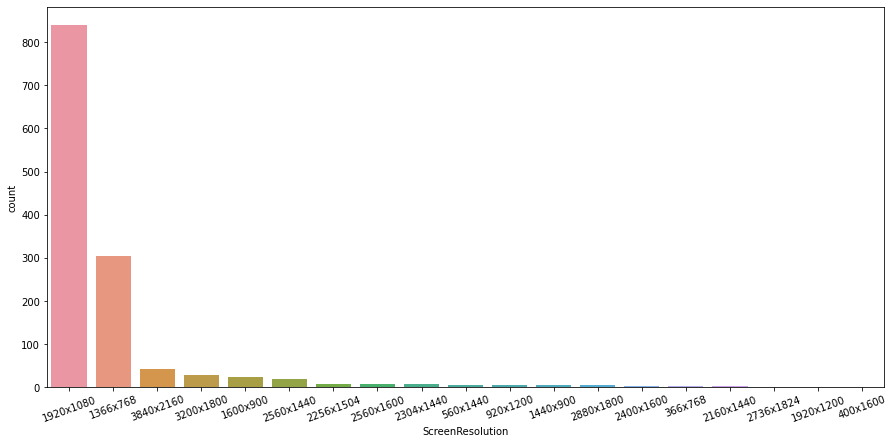

In [32]:
plt.figure(figsize=(15,7))
sn.countplot(x='ScreenResolution',data=df,order=df['ScreenResolution'].value_counts().index)
plt.xticks(rotation=20)

we observe that 1920x1080 (FHD) is the most popular display resolution across all dfs

In [33]:
X=df['ScreenResolution'].str.split("x",expand=True)
df['X_res']=X[0]
df['Y_res']=X[1]
for value in ['X_res','Y_res']:
    df[value]=df[value].astype("int")

## Feature Engineering

In [34]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram (GB),Memory,Gpu,OpSys,Weight (kg),Price_euros,TouchScreen,IPS Display panel,X_res,Y_res
0,1,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,3,HP,250 G6,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080
3,4,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800
4,5,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600


### Pixel Per Inch

Pixel density indicates how many pixels per inch (PPI) there are on a display. The higher the pixel density, the more detailed and spacious the picture is.

In contrast, displays with low pixel density will have less screen space and more pixelated image quality.

Inches and resolution give almost the same amount of information we can combine them into a single metric PixelPerInch or PPI for short its calculated like the following. At the end of the day, our goal is to improve the performance by having fewer features.

$$
    PPI = \frac{\sqrt{X_{resolution}^2+Y_{resolution}^2}}{inches}
$$

In [35]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [36]:
df["Res_value"]=df['X_res']*df['Y_res']
df.drop(columns = ['X_res','Y_res'], inplace=True)

In [37]:
Convert=dict(zip(df["Res_value"].value_counts().index, df["ScreenResolution"].value_counts().index))
df.pop('ScreenResolution')

0       2560x1600
1        1440x900
2       1920x1080
3       2880x1800
4       2560x1600
          ...    
1298    1920x1080
1299    3200x1800
1300     1366x768
1301     1366x768
1302     1366x768
Name: ScreenResolution, Length: 1303, dtype: object

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   laptop_ID          1303 non-null   int64  
 1   Company            1303 non-null   object 
 2   Product            1303 non-null   object 
 3   TypeName           1303 non-null   object 
 4   Inches             1303 non-null   float64
 5   Cpu                1303 non-null   object 
 6   Ram (GB)           1303 non-null   int32  
 7   Memory             1303 non-null   object 
 8   Gpu                1303 non-null   object 
 9   OpSys              1303 non-null   object 
 10  Weight (kg)        1303 non-null   float64
 11  Price_euros        1303 non-null   float64
 12  TouchScreen        1303 non-null   int64  
 13  IPS Display panel  1303 non-null   int64  
 14  ppi                1303 non-null   float64
 15  Res_value          1303 non-null   int32  
dtypes: float64(4), int32(2),

<AxesSubplot:xlabel='Inches', ylabel='Price_euros'>

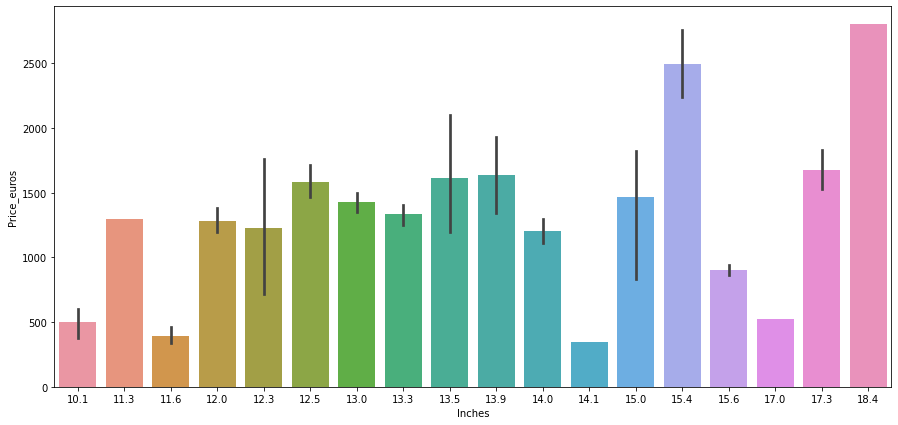

In [39]:
plt.figure(figsize=(15,7))
sn.barplot(x ='Inches', y='Price_euros',data=df)

df.drop(columns = ['Inches','X_res','Y_res'], inplace=True)

### `CPU` column

The CPU column also contains lots of information, like CPU manifactuer and model and also it's speed (GHz) with 118 different categories.

In [40]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

we will put the CPU speed in it's own column and change its dtype

In [41]:
X=df['Cpu'].str.split(r" (?!(?![0-9]\.))",regex=True,expand=True)
df['Cpu']=X[0]
df['GHz']=X[1].str.replace('GHz','')
df['GHz']=df['GHz'].astype("float64")

We will be clustering this column, so each df will either have an one of intel processors (Intel Xeon, i3, i5, i7 or Other Intel Processor) or AMD Processor

In [42]:
import re
def get_processor(x):
    match=re.search(r'Intel Core i[357]',x)
    if match:
        return match[0]
    if 'xeon' in x.lower():
        return 'Intel Xeon E3'
    if 'intel' in x.lower():
        return 'Other Intel Processor'
    return 'AMD Processor'
        

In [43]:
df['Cpu_brand']=df['Cpu'].apply(get_processor)

How does the price vary with processors?

c:\Users\amine\OneDrive\Documents\GitHub\Laptop_Price_predection\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Intel Core i7'),
  Text(1, 0, 'Intel Core i5'),
  Text(2, 0, 'Other Intel Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'AMD Processor'),
  Text(5, 0, 'Intel Xeon E3')])

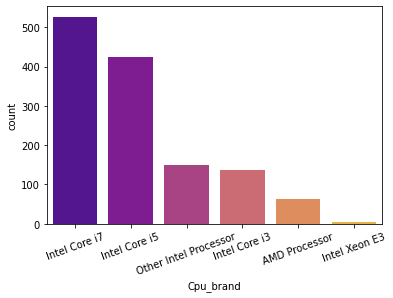

In [44]:
df.pop('Cpu')
sn.countplot(df['Cpu_brand'],palette='plasma',order=df['Cpu_brand'].value_counts().index)
plt.xticks(rotation=20)

<AxesSubplot:xlabel='Price_euros', ylabel='Cpu_brand'>

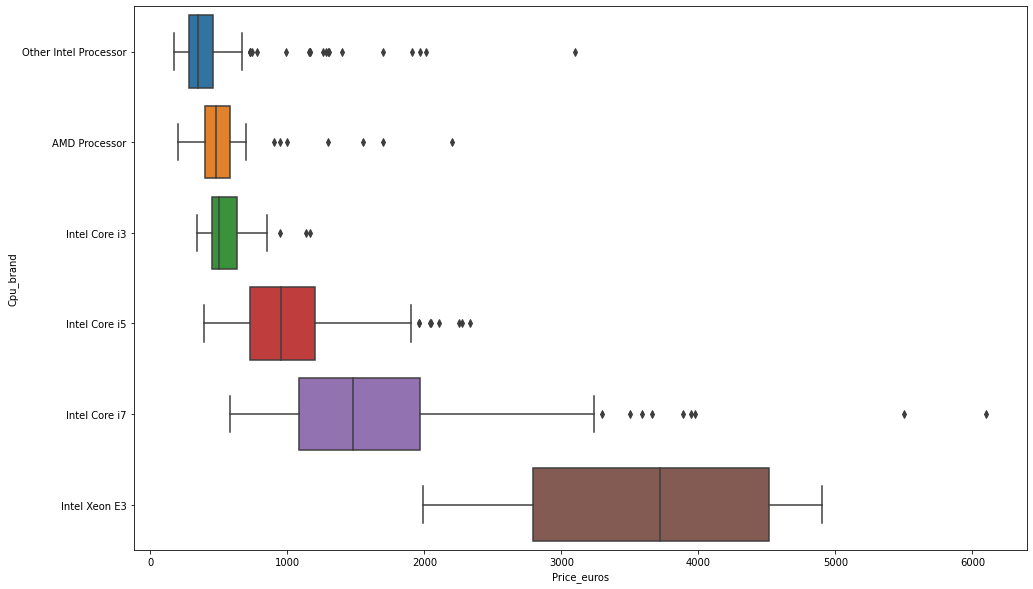

In [45]:
plt.subplots(figsize=(16,10))
x = df.groupby(['Cpu_brand']).Price_euros.median().sort_values().keys()
sn.boxplot(x='Price_euros',y='Cpu_brand',data= df,order=x)

Xeon processors are one if the best processors Intel offers which explains their very high price we can also see that i7 and i5 processors are the most popular and better than core i3 and AMD

### Storage

In [46]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

First of all let's standardize the units and remove the decimal point

In [47]:
df['Memory']=df['Memory'].str.replace('.0','',regex=False)
df['Memory']=df['Memory'].str.replace('GB','')
df['Memory']=df['Memory'].str.replace('TB','000')

In [48]:
def get_memory(mem,StorageType='HDD'):
  if StorageType in mem.split(' '):
    i = mem.split(' ').index(StorageType)
    return mem.split(' ')[i-1]
  else:
    return 0


In [49]:
for type in ['HDD', 'SSD','Flash','Hybrid']:
    df[type]=df['Memory'].apply(lambda x: get_memory(x,StorageType=type))

In [50]:
df.pop('Memory')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,Ram (GB),Gpu,OpSys,Weight (kg),Price_euros,TouchScreen,IPS Display panel,ppi,Res_value,GHz,Cpu_brand,HDD,SSD,Flash,Hybrid
0,1,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,4096000,2.3,Intel Core i5,0,128,0,0
1,2,Apple,Macbook Air,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,1296000,1.8,Intel Core i5,0,0,128,0
2,3,HP,250 G6,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,2073600,2.5,Intel Core i5,0,256,0,0
3,4,Apple,MacBook Pro,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,5184000,2.7,Intel Core i7,0,512,0,0
4,5,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,4096000,3.1,Intel Core i5,0,256,0,0


### Gpu

In [51]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

df['Gpu_manufacturer']=df['Gpu'].apply(lambda args: args.split()[0])

In [52]:
df.loc[182,'Gpu']='AMD Radeon R7'

In [60]:
def get_Gpu(x):
    if 'Intel' in x:
        return 'Intel Iris Graphics' if 'Iris' in x else "Intel HD Graphics"
    if  'AMD' in x:
        match = re.search(r'R[579X]',x)
        if match:
            return 'AMD Radeon '+match.group()
        if 'FirePro' in x:
            return 'AMD FirePro'
        else:
            return "Other AMD Radeon"
    # if not AMD or Intel then its Nvidia
    if 'Nvidia' in x:
        if 'Quadro' in x:
            return 'Nvidia Quadro'
        if 'GTX' in x:
            return 'Nvidia GeForce GTX'
        else:
            return 'Nvidia GeForce GT'
    return 'Other Gpu'
    

In [61]:
df['Gpu_model']=df['Gpu'].apply(get_Gpu)

<AxesSubplot:xlabel='Price_euros', ylabel='Gpu_model'>

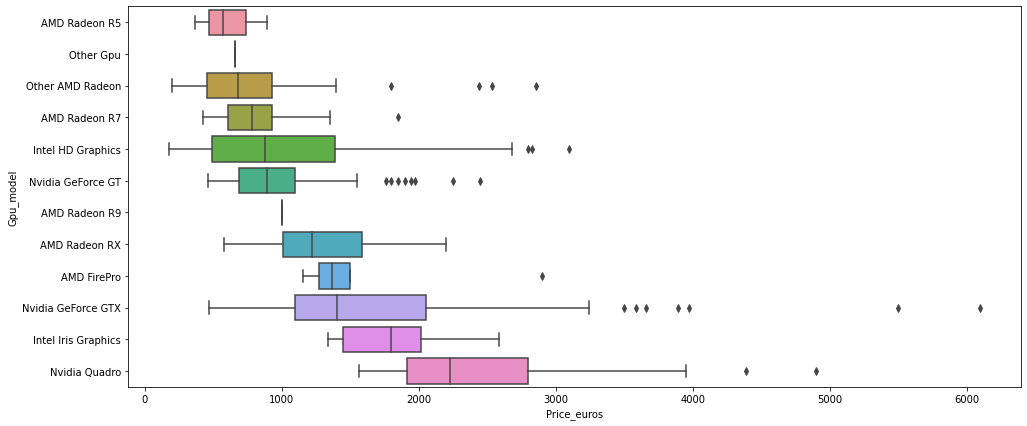

In [62]:
plt.subplots(figsize=(16,7))
x = df.groupby(['Gpu_model']).Price_euros.median().sort_values().keys()
sn.boxplot(x='Price_euros',y='Gpu_model',data= df,order=x)

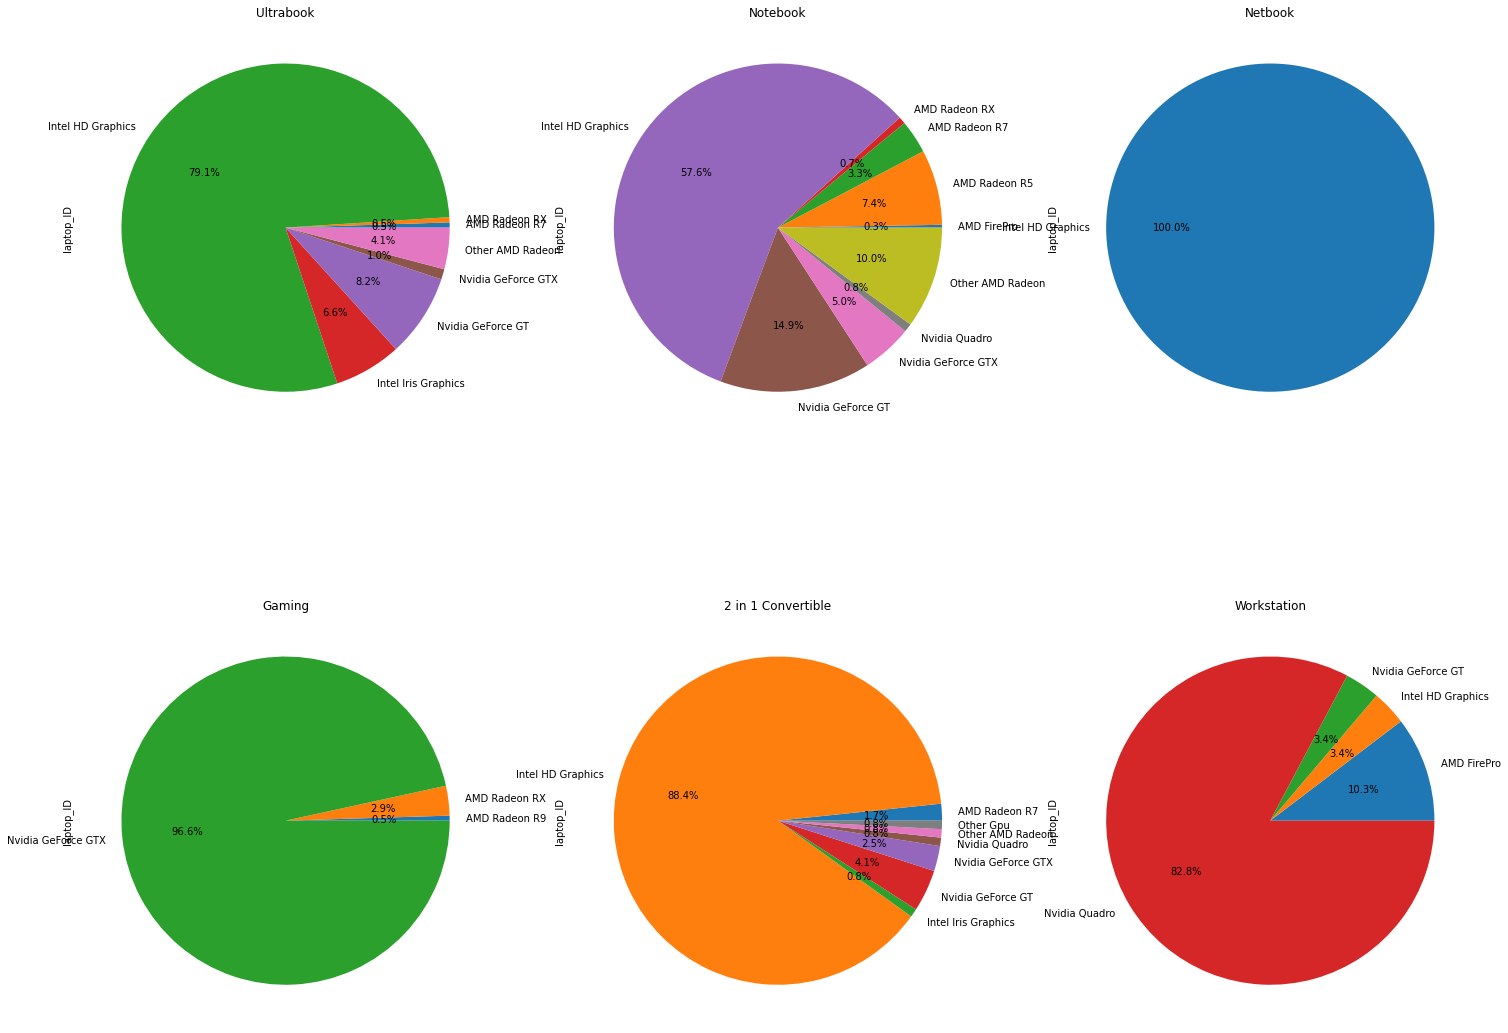

In [74]:
f, ax = plt.subplots(2,3,figsize=(25,20))
companies=df["TypeName"].unique()
j=i=0
for company in companies[0:12]:
  data = df.groupby(["TypeName","Gpu_model"]).count()['laptop_ID'][company]   
  data.plot.pie (autopct="%.1f%%",ax=ax[i][j])
  ax[i][j].set_title(company)
  j+=1
  if j%3 == 0:
    i+=1
    j=0

In [59]:
df[df['Gpu_model']=='Other Gpu']

,laptop_ID,Company,Product,TypeName,Inches,Ram (GB),Gpu,OpSys,Weight (kg),Price_euros,...,IPS Display panel,ppi,Res_value,GHz,Cpu_brand,HDD,SSD,Flash,Hybrid,Gpu_model
177,181,MSI,GT80S 6QF-074US,Gaming,18.4,32,Nvidia GTX 980 SLI,Windows 10,4.40,2799.0,...,0,119.723216,2073600,2.9,Intel Core i7,1000,512,0,0,Other Gpu
1191,1209,Samsung,Chromebook Plus,2 in 1 Convertible,12.3,4,ARM Mali T860 MP4,Chrome OS,1.15,659.0,...,1,134.084736,640000,2.0,AMD Processor,0,0,32,0,Other Gpu


In [361]:
df.drop(columns = ['laptop_ID','Product','Inches', 'Gpu'], inplace=True)

In [55]:
df

,laptop_ID,Company,Product,TypeName,Inches,Ram (GB),Gpu,OpSys,Weight (kg),Price_euros,...,IPS Display panel,ppi,Res_value,GHz,Cpu_brand,HDD,SSD,Flash,Hybrid,Gpu_model
0,1,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,...,1,226.983005,4096000,2.3,Intel Core i5,0,128,0,0,Intel Iris Graphics
1,2,Apple,Macbook Air,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,898.94,...,0,127.677940,1296000,1.8,Intel Core i5,0,0,128,0,Intel HD Graphics
2,3,HP,250 G6,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,575.00,...,0,141.211998,2073600,2.5,Intel Core i5,0,256,0,0,Intel HD Graphics
3,4,Apple,MacBook Pro,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,2537.45,...,1,220.534624,5184000,2.7,Intel Core i7,0,512,0,0,Other AMD Radeon
4,5,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,...,1,226.983005,4096000,3.1,Intel Core i5,0,256,0,0,Intel Iris Graphics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Intel HD Graphics 520,Windows 10,1.80,638.00,...,1,157.350512,2073600,2.5,Intel Core i7,0,128,0,0,Intel HD Graphics
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Intel HD Graphics 520,Windows 10,1.30,1499.00,...,1,276.053530,5760000,2.5,Intel Core i7,0,512,0,0,Intel HD Graphics
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Intel HD Graphics,Windows 10,1.50,229.00,...,0,111.935204,1049088,1.6,Other Intel Processor,0,0,64,0,Intel HD Graphics
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,AMD Radeon R5 M330,Windows 10,2.19,764.00,...,0,100.454670,1049088,2.5,Intel Core i7,1000,0,0,0,AMD Radeon R5


## Encoding Categorical Data

In ordinal encoding, each unique category value is assigned an integer value.

For example, “Ultrabook” is 4, “Netbook” is 0, and “Notebook” is 3.

This is called an ordinal encoding or an integer encoding and is easily reversible. Often, integer values starting at zero are used.

In [363]:
df.columns

Index(['Company', 'TypeName', 'Ram (GB)', 'OpSys', 'Weight (kg)',
       'Price_euros', 'TouchScreen', 'IPS Display panel', 'ppi', 'Res_value',
       'GHz', 'Cpu_brand', 'HDD', 'SSD', 'Flash', 'Hybrid', 'Gpu_manufacturer',
       'Gpu_model'],
      dtype='object')

In [364]:
for column in ['Company', 'TypeName', 'OpSys','Cpu_brand','Gpu_manufacturer','Gpu_model']:    
    x = df.groupby([column]).Price_euros.median().sort_values().keys()
    df[column].replace(x,[x for x in range(x.shape[0])],inplace=True)

In [365]:
df.head()

,Company,TypeName,Ram (GB),OpSys,Weight (kg),Price_euros,TouchScreen,IPS Display panel,ppi,Res_value,GHz,Cpu_brand,HDD,SSD,Flash,Hybrid,Gpu_manufacturer,Gpu_model
0,11,4,8,8,1.37,1339.69,0,1,226.983005,4096000,2.3,3,0,128,0,0,2,10
1,11,4,8,8,1.34,898.94,0,0,127.677940,1296000,1.8,3,0,0,128,0,2,4
2,6,1,8,2,1.86,575.00,0,0,141.211998,2073600,2.5,3,0,256,0,0,2,4
3,11,4,16,8,1.83,2537.45,0,1,220.534624,5184000,2.7,4,0,512,0,0,1,2
4,11,4,8,8,1.37,1803.60,0,1,226.983005,4096000,3.1,3,0,256,0,0,2,10


### Correlation

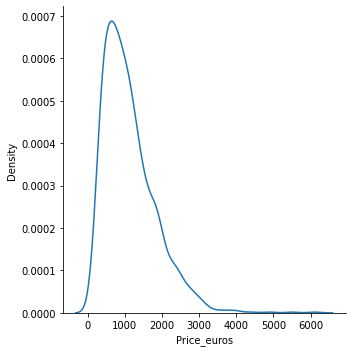

In [372]:
sn.displot(df['Price_euros'],kind='kde')

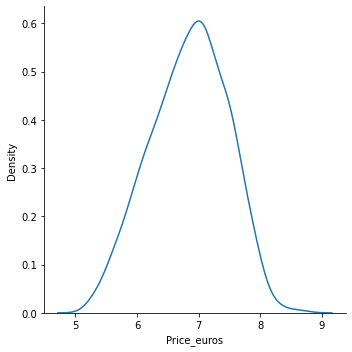

In [373]:
sn.displot(np.log(df['Price_euros']),kind='kde')

<AxesSubplot:>

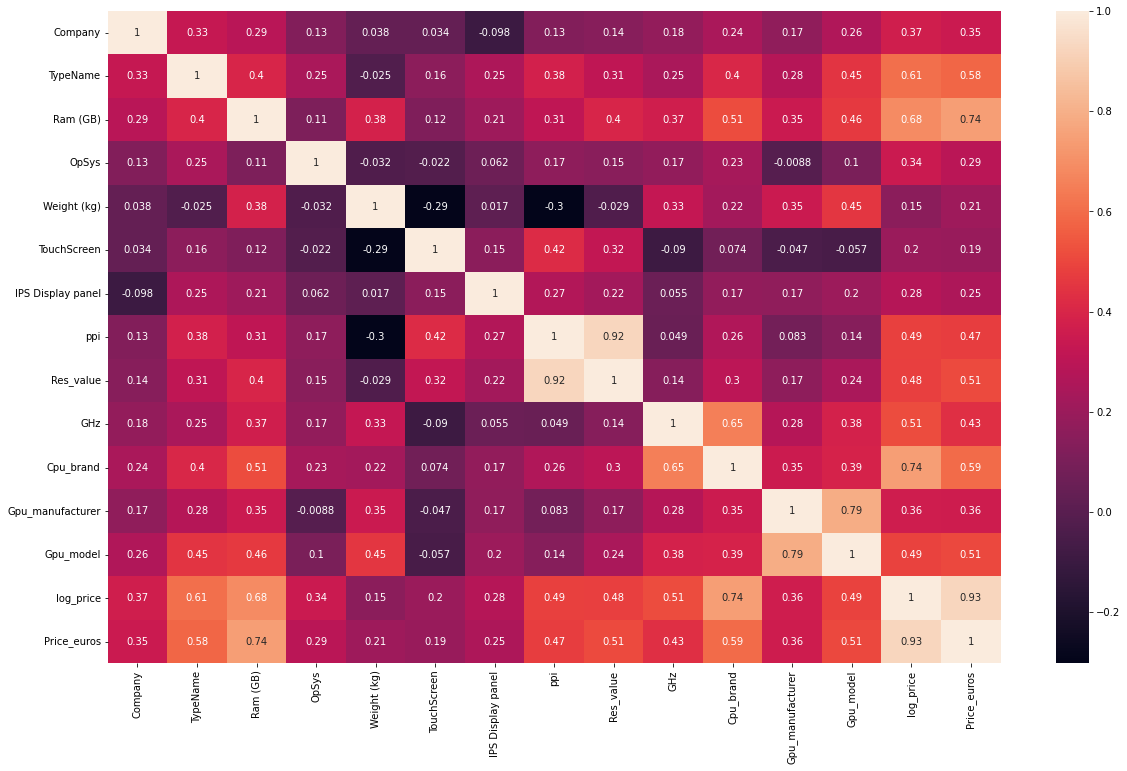

In [367]:
df['log_price']=np.log(df['Price_euros'])
df['Price_euros']=df.pop('Price_euros')
plt.figure(figsize=(20,12))
sn.heatmap(df.corr(),annot=True)

In [368]:
df.corr()['Price_euros'].sort_values(ascending=False)

Price_euros          1.000000
log_price            0.927581
Ram (GB)             0.743007
Cpu_brand            0.594846
TypeName             0.578877
Res_value            0.508977
Gpu_model            0.505975
ppi                  0.473927
GHz                  0.432642
Gpu_manufacturer     0.355905
Company              0.347357
OpSys                0.294517
IPS Display panel    0.252208
Weight (kg)          0.210370
TouchScreen          0.191226
Name: Price_euros, dtype: float64

In [369]:
df.corr()['log_price'].sort_values(ascending=False)

log_price            1.000000
Price_euros          0.927581
Cpu_brand            0.743381
Ram (GB)             0.684803
TypeName             0.607361
GHz                  0.514932
Gpu_model            0.487746
ppi                  0.485652
Res_value            0.479615
Company              0.365873
Gpu_manufacturer     0.360963
OpSys                0.344344
IPS Display panel    0.281944
TouchScreen          0.196460
Weight (kg)          0.151674
Name: log_price, dtype: float64

### Model Building

Now that have prepared our data and hold a better understanding of the dataset. let’s get started with Machine learning modeling! and finding the best algorithm with the best hyperparameters to achieve maximum accuracy

let's load the libraries that we will use

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor


In [ ]:
Y=df[]